In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt   #importing all required toolkits
%matplotlib inline
sns.set_style('white')



df1=pd.read_csv("C:/Users/user/Desktop/TSP intern/Indian Premier League/matches.csv")  # reading the file and saving it to df1

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [3]:
df1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [4]:
df1.isnull().sum()   #finding out the null values of the dataframe

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
df2=df1.drop(['umpire3'],axis=1)  # since it has lot of null values, dropping umpire3

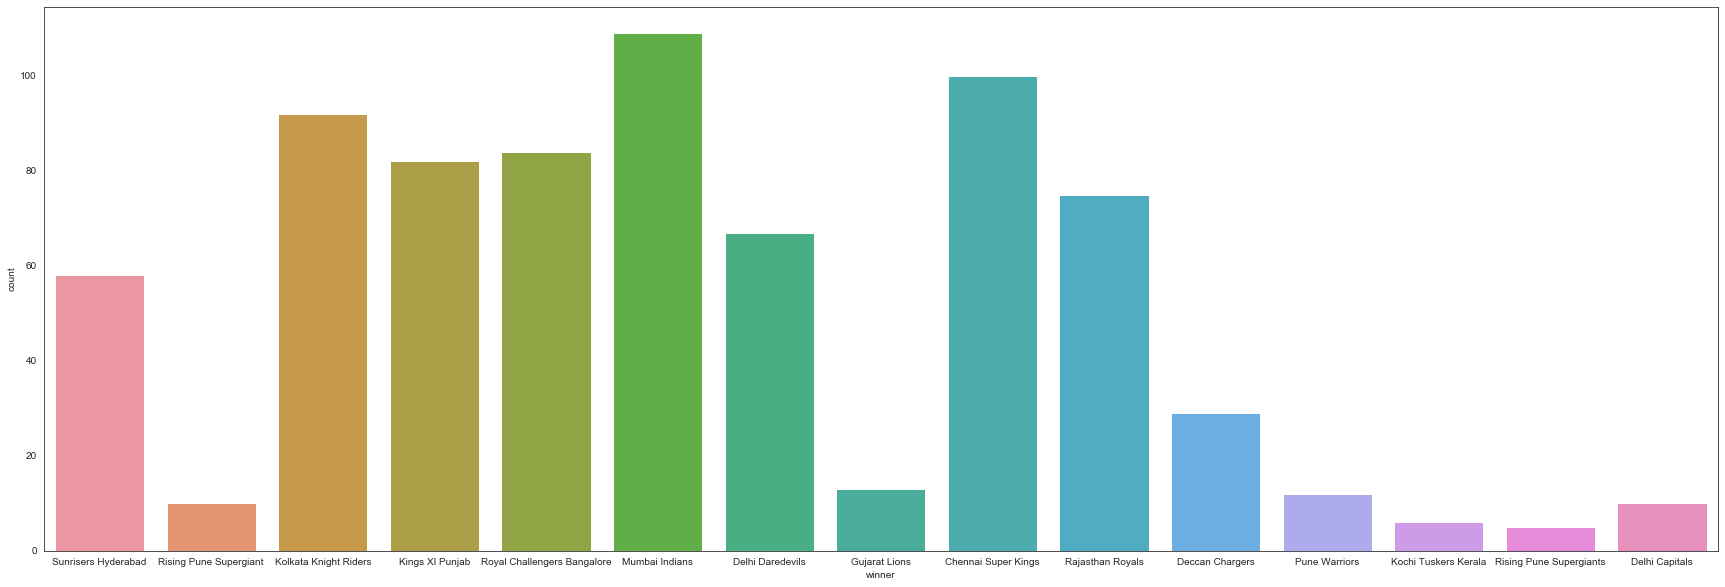

In [6]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='winner',data=df1)      # finding the most successful teams in seasons 2008 to 2019 and plotting 

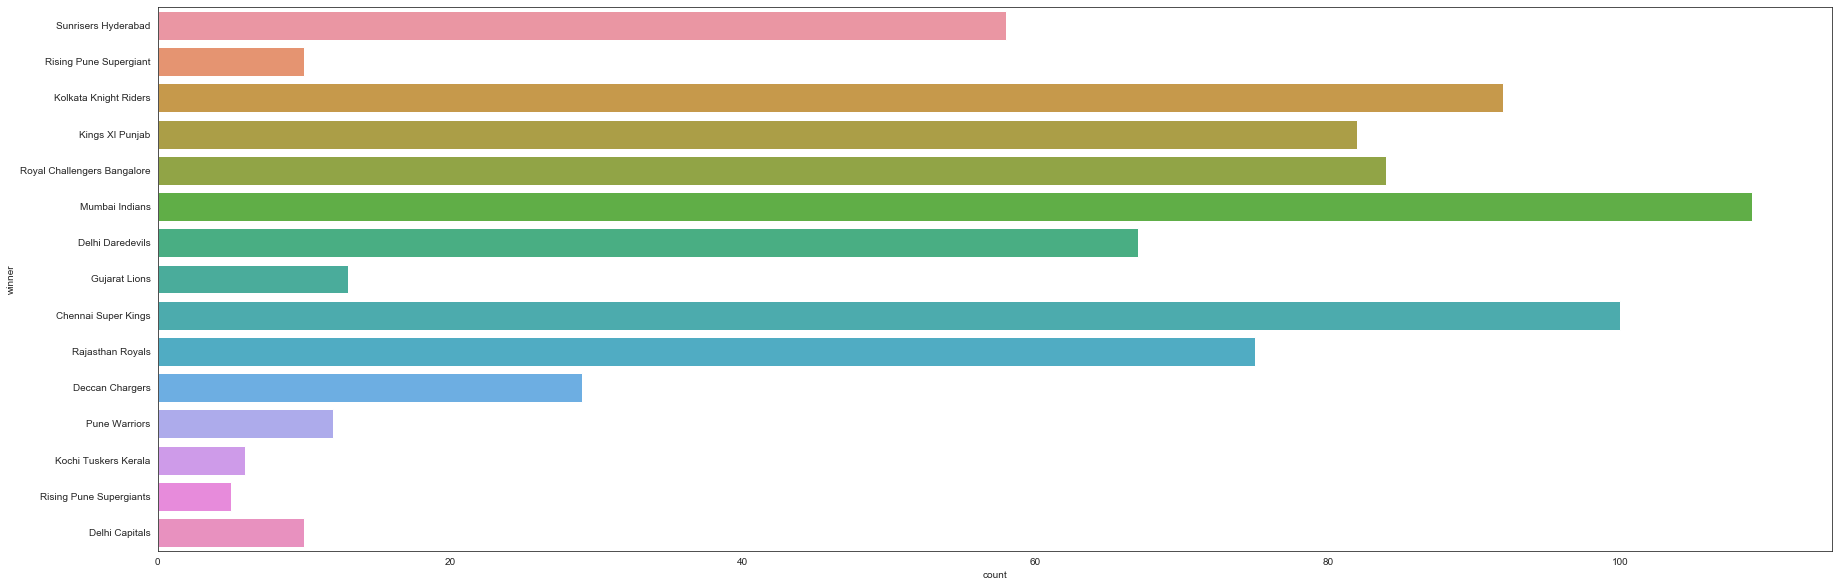

In [7]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y='winner',data=df1)      # countplot of winners

In [8]:
df2.groupby('season')['winner'].value_counts()   # Seasonwise perfomance of each team

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

In [9]:
tot_wins=df2['winner'].value_counts()
tot_wins                                          # number of total wins for each team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [12]:
df_pom=df2['player_of_match'].value_counts().to_frame()
df_pom.head()                                              # finding most successful players who won player of the match

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
DA Warner,17
MS Dhoni,17


In [13]:
df_pom=df_pom.reset_index()
df_pom.rename({'index':"PlayerName"})       #reseting index 

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


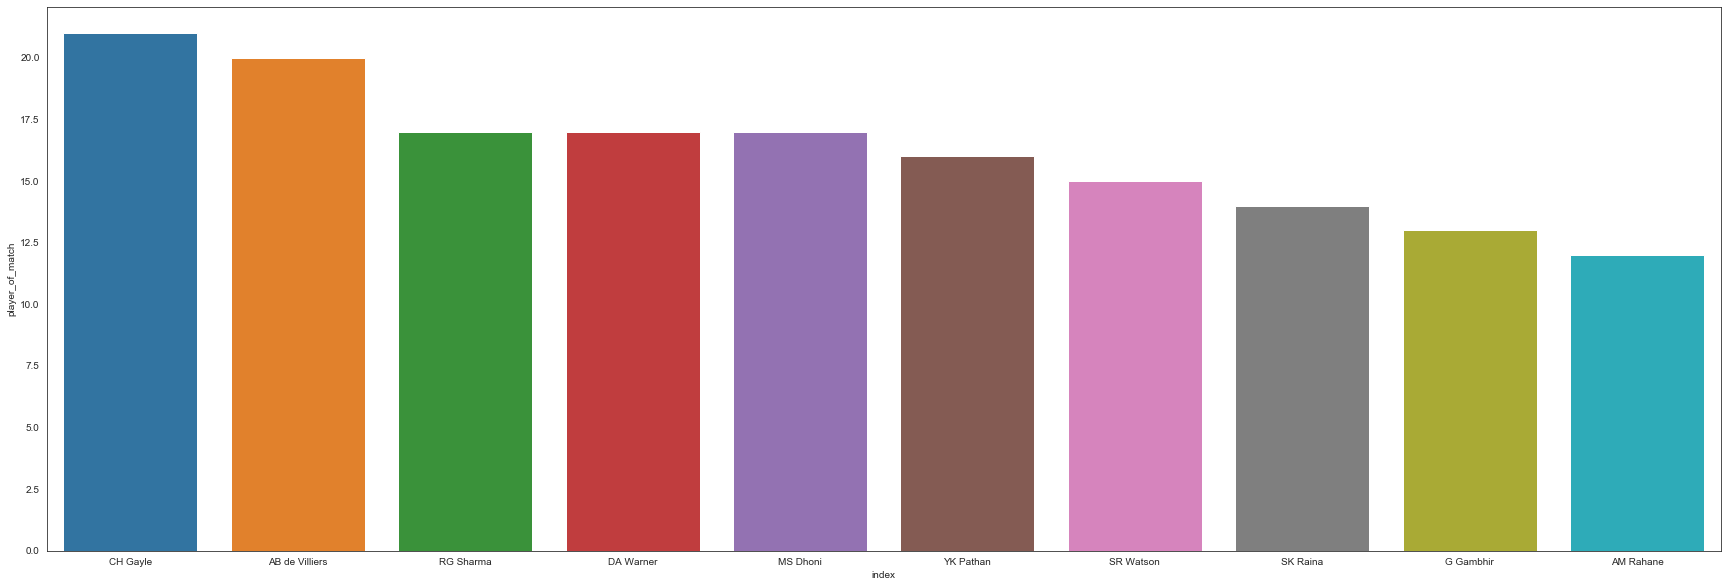

In [14]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="index",y="player_of_match",data=df_pom.head(10))  # plot of the pom winners by number

In [15]:
df2[df2["toss_winner"]==df2["winner"]]["winner"].value_counts()/df2["winner"].value_counts()  # probabilty of winning for a team if the win the toss

Chennai Super Kings            0.570000
Deccan Chargers                0.655172
Delhi Capitals                 0.700000
Delhi Daredevils               0.522388
Gujarat Lions                  0.769231
Kings XI Punjab                0.426829
Kochi Tuskers Kerala           0.666667
Kolkata Knight Riders          0.576087
Mumbai Indians                 0.513761
Pune Warriors                  0.250000
Rajasthan Royals               0.560000
Rising Pune Supergiant         0.500000
Rising Pune Supergiants        0.600000
Royal Challengers Bangalore    0.488095
Sunrisers Hyderabad            0.396552
Name: winner, dtype: float64

In [16]:
df2[(df2["toss_winner"]==df2["winner"]) & (df2["toss_decision"]=='field')]["winner"].value_counts() # total count of values for win by chasing

Kolkata Knight Riders          38
Royal Challengers Bangalore    32
Mumbai Indians                 31
Kings XI Punjab                29
Rajasthan Royals               27
Chennai Super Kings            27
Delhi Daredevils               24
Sunrisers Hyderabad            15
Gujarat Lions                  10
Deccan Chargers                 8
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [17]:
df2[(df2["toss_winner"]==df2["winner"]) & (df2["toss_decision"]=='bat')]["winner"].value_counts()  # total count of victories by first batting

Chennai Super Kings            30
Mumbai Indians                 25
Rajasthan Royals               15
Kolkata Knight Riders          15
Delhi Daredevils               11
Deccan Chargers                11
Royal Challengers Bangalore     9
Sunrisers Hyderabad             8
Kings XI Punjab                 6
Pune Warriors                   3
Delhi Capitals                  1
Name: winner, dtype: int64

In [18]:
df_deliv=pd.read_csv("C:/Users/user/Desktop/TSP intern/Indian Premier League/deliveries.csv")  # reading the second dataframe 

In [19]:
df_deliv.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [20]:
import copy

df4=copy.deepcopy(df_deliv)  # copying it to another dataframe(new)

In [21]:
df4["new_id"]=df4["match_id"].astype(str)+df4["inning"].astype(str)  # adding a new id called 'new_id' which is useful for accessing by match id and innings

In [22]:
df4.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,new_id
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,11
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,11
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,11
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,11
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,11
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,11
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,1,0,0,0,1,1,NaN,NaN,NaN,11
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,1,0,1,NaN,NaN,NaN,11
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,4,0,4,NaN,NaN,NaN,11
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,1,0,0,1,1,NaN,NaN,NaN,11


In [23]:
df4["new_id"]=df4["new_id"].astype(int) # converting it to int for further ease of analysis

In [24]:
df5=pd.DataFrame(df4.groupby("new_id").sum()['total_runs'])  # grouping by the new id and finding the total runs of each innings by using sum function

In [25]:
df5.reset_index(inplace=True)

In [26]:
s_b=df5[(df5['new_id']%2==0)]  # storing the total runs of each team in the second innings as s_b

In [27]:
s_b.head(10)

,new_id,total_runs
1,12,172
3,22,187
5,32,184
7,42,164
9,52,142
11,62,140
13,72,180
15,82,150
17,92,108
19,102,159


In [28]:
f_b=df5[(df5['new_id']%2!=0)]
f_b.head(10) # storing the total runs of each team in the first innings as f_b

,new_id,total_runs
0,11,207
2,21,184
4,31,183
6,41,163
8,51,157
10,61,135
12,71,178
14,81,148
16,91,205
18,101,158


In [29]:
f1_b=f_b.reset_index()
s1_b=s_b.reset_index()

In [30]:
final=pd.concat([f1_b,s1_b],axis=1, join='outer') # joining both f_b and s_b

In [31]:
final.columns=['index1', 'new_id1', 'total_runs1', 'index2', 'new_id2', 'total_runs2'] #making new columns to differentiate both innings and get total runs in an innings

In [32]:
len(final[(final['total_runs1']>170) & (final["total_runs1"]>final["total_runs2"])])  #finding the total no of matches in which first batting team scored>170 and won

245

In [33]:
len(final[(final['total_runs1']>170)])  #finding the total no of matches in which first batting team scored>170 

306

In [34]:
245/306  # 80 percent chance to win if first batting team scores >170

0.8006535947712419

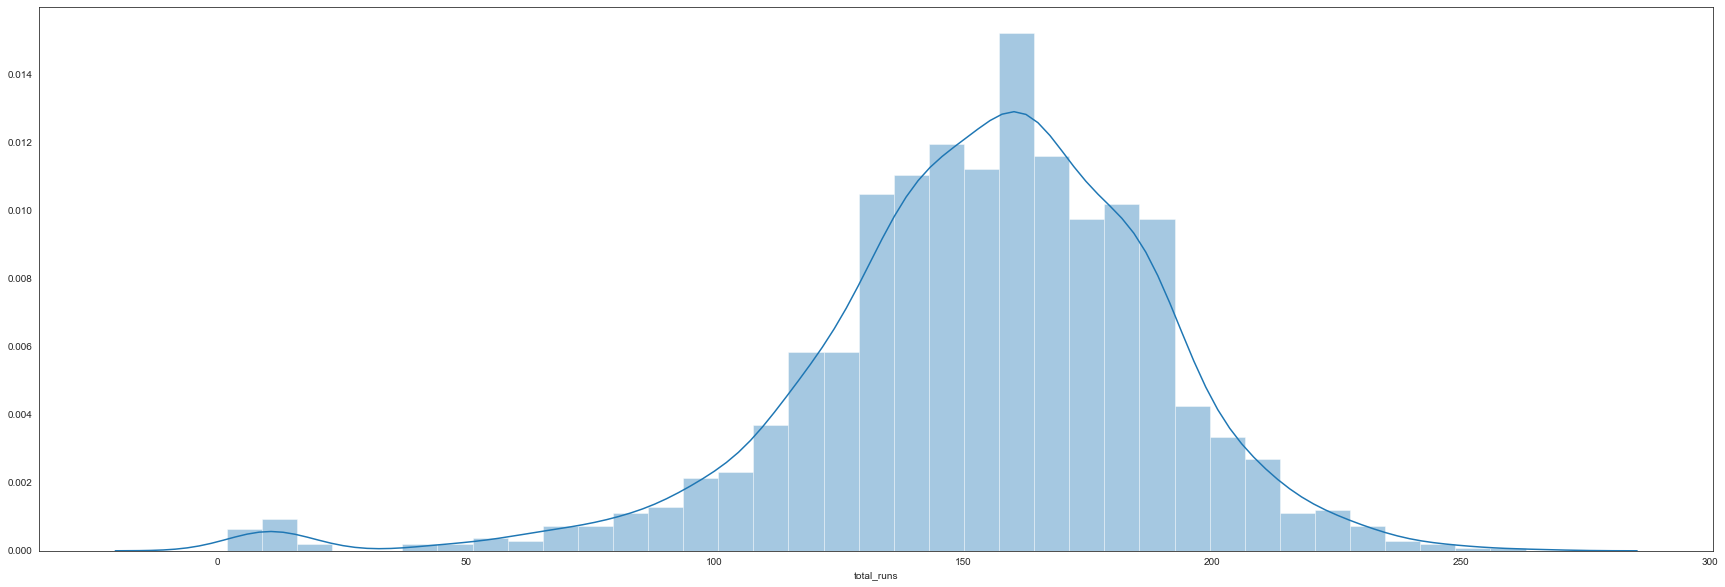

In [35]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df5['total_runs'])   # a distribution plot off all the innings,,maximum number in the 160-170 region

In [36]:
len(final[(final['total_runs1']<140) & (final["total_runs1"]>final["total_runs2"])])  #finding the total no of matches in which first batting team scored < 140 & won

38

In [37]:
len(final[(final['total_runs1']<140)]) #finding the total no of matches in which first batting team scored < 140

175

In [38]:
38/175  # only 21 percent chance of winning if the team bats first and scores<140

0.21714285714285714

In [39]:
df4.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,new_id
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,11
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,11
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,11
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,11
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,11
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,11
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,1,0,0,0,1,1,NaN,NaN,NaN,11
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,1,0,1,NaN,NaN,NaN,11
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,4,0,4,NaN,NaN,NaN,11
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,1,0,0,1,1,NaN,NaN,NaN,11


In [40]:

df6=copy.deepcopy(df4)  # copying into a new dataframe

In [41]:
df6["player_dismissed"].fillna(0,inplace=True)  # replacing NA values in column to zero for further analysis

In [42]:
wickets=[0]*len(df6)
for i in range(len(df6)):
        if df6["player_dismissed"].iloc[i]!=0:
            wickets[i]=1
        else:
            wickets[i]=0
    
    # creating a list called wickets and storing 1 if the batsman was dismissed in the ball and zero else

In [43]:
df6["wickets"]=wickets  # adding wickets to the dataframe

In [44]:
df6.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,new_id,wickets
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,11,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,11,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,0,NaN,NaN,11,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,11,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,0,NaN,NaN,11,0


In [45]:
f =None

s=0
l1=[]
l2=[]

for i in range(0,len(df6)):
    if f==df6["new_id"].iloc[i]:
        continue
    elif df6["wickets"].iloc[i]==0 and df6["new_id"].iloc[i]==df6["new_id"].iloc[i+1]:
        s+=df6["total_runs"].iloc[i]
        
    else:
        if df6["inning"].iloc[i]<3 and df6["match_id"].iloc[i] not in [301,546] : # for only first and second innings (no superovers incl)
            l1.append(s)
            l2.append(df6["new_id"].iloc[i])
        s=0
        
        f=df6["new_id"].iloc[i]
        
    
## a function which takes up the amount of runs scored by the team before first wicket is lost.. It is saved in the list l1, the index is stored in l2

In [46]:
len(l1)

1508

In [47]:
len(df6["new_id"].value_counts())

1528

In [48]:
l1first=[l1[i] for i in range(0,len(l1),2)]  # storing the values of first innings in l1first

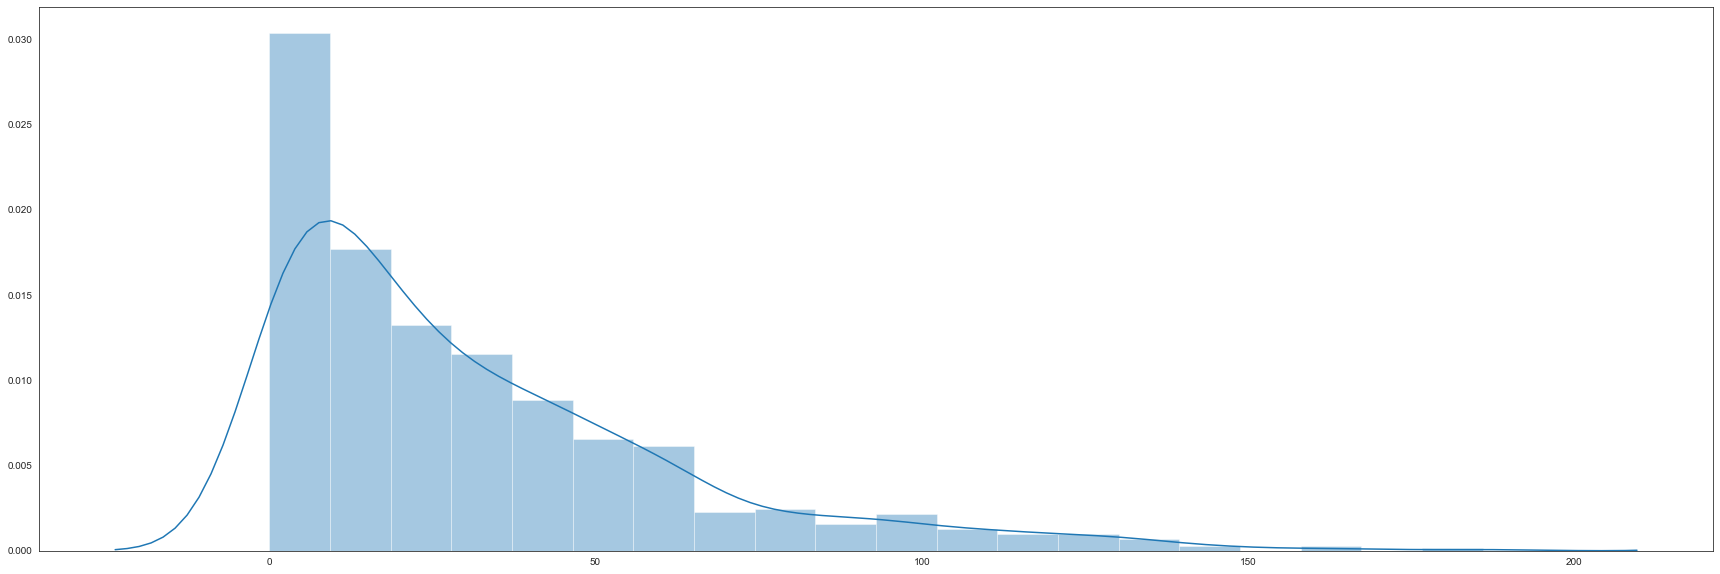

In [49]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(l1first,bins=20)   # plot of runs scored before loss of first wicket

In [50]:
l1second=[l1[i] for i in range(1,len(l1),2)] # storing the values of second innings in l1first

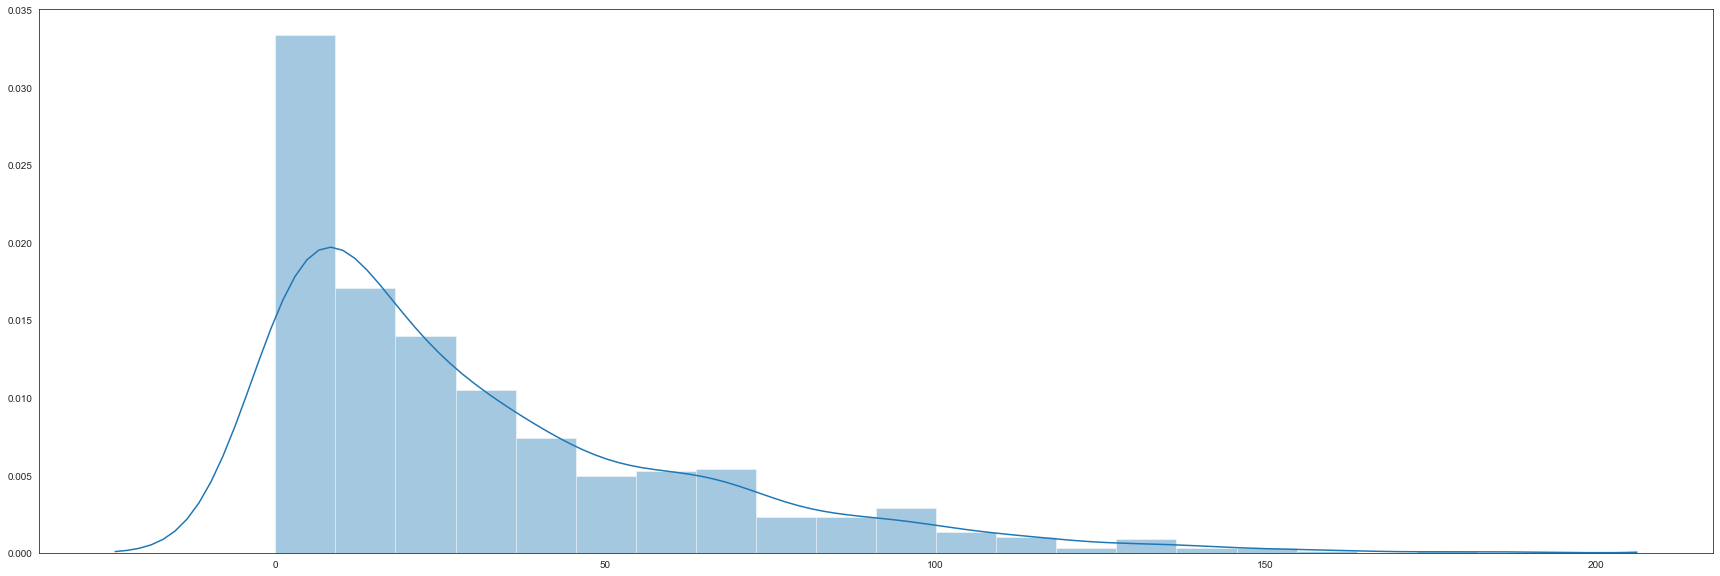

In [51]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(l1second,bins=20)   #plot

In [52]:
l2second=[i//2 for i in range(1,len(l1),2) if l1[i]>80]
l2first=[i//2 for i in range(0,len(l1),2) if l1[i]>80]  # taking all values in which total score is >80 before loss of first wicket

In [53]:
len(l2second)

68

In [54]:
len(l2first)

64

In [55]:
dfnew=df2.reset_index()

In [57]:
dfnew[dfnew["result"]=='no result']  # finding mathces with no result ... It was removed in the function above so 

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [58]:
dfnew=dfnew.drop([300,545])  # dropping those matches

In [59]:
dfnew.iloc[l2first]   # from the l2first we strored from the other dataframe. locating it in the dfnew dataframe

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
9,9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan
19,19,20,2017,Rajkot,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma
31,31,32,2017,Chandigarh,2017-04-28,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,26,0,Rashid Khan,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,CK Nandan
35,35,36,2017,Hyderabad,2017-04-30,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi
51,51,52,2017,Kanpur,2017-05-13,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,8,Mohammed Siraj,Green Park,AK Chaudhary,Nitin Menon
79,79,80,2008,Hyderabad,2008-05-25,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen
96,96,97,2008,Chandigarh,2008-05-28,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,41,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",SJ Davis,K Hariharan
100,100,101,2008,Jaipur,2008-05-17,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rajasthan Royals,65,0,GC Smith,Sawai Mansingh Stadium,BF Bowden,SL Shastri
109,109,110,2008,Chennai,2008-05-24,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri
121,121,122,2009,Port Elizabeth,2009-04-20,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park,BG Jerling,SJA Taufel


In [60]:
dfnew.iloc[l1first]

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
19,19,20,2017,Rajkot,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma
45,45,46,2017,Chandigarh,2017-05-07,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,VK Sharma
22,22,23,2017,Kolkata,2017-04-21,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,4,SK Raina,Eden Gardens,CB Gaffaney,Nitin Menon
1,1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
26,26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan
35,35,36,2017,Hyderabad,2017-04-30,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi
44,44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin
2,2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
2,2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
81,81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen


In [61]:
def func(row):
    if row["toss_decision"]=='field':
        return row["toss_winner"]!=row["winner"]
    if row["toss_decision"]=='bat':
        return row["toss_winner"]==row["winner"]
    
    # function which determines if the team won by batting first and lost if they did batting second

In [62]:
len(dfnew.apply(func,axis=1))

754

In [63]:
len(l2second)

68

In [64]:
dfnew.iloc[l2second]

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
12,12,13,2017,Rajkot,2017-04-14,Rising Pune Supergiant,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,7,AJ Tye,Saurashtra Cricket Association Stadium,A Nand Kishore,S Ravi
21,21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin
44,44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin
45,45,46,2017,Chandigarh,2017-05-07,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,VK Sharma
49,49,50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore
71,71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
78,78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan
88,88,89,2008,Jaipur,2008-05-09,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,8,YK Pathan,Sawai Mansingh Stadium,MR Benson,AM Saheba
89,89,90,2008,Bangalore,2008-05-28,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,CRD Fernando,M Chinnaswamy Stadium,BF Bowden,AV Jayaprakash


In [65]:
dfnew.iloc[l2first].apply(func,axis=1).sum()

40

In [66]:
len(l2first)

64

In [67]:
40/64  # 62.5 percent of the time team which did first batting won if they scored > 80 before loss of first wwicket

0.625

In [68]:
def func2(row):
    if row["toss_decision"]=='field':
        return row["toss_winner"]==row["winner"]
    if row["toss_decision"]=='bat':
        return row["toss_winner"]!=row["winner"]
     # function which determines if the team won by cahsing and lost if they did batting first

In [69]:
dfnew.iloc[l2second].apply(func2,axis=1).sum()

62

In [70]:
len(l2second)

68

In [71]:
62/68   # 91 percent of the time team which did chasing won if they socred >80 before loss of first wicket..

0.9117647058823529

In [73]:
column_names=["match_id","Season"]
lists=pd.DataFrame(columns=column_names)
lists["match_id"]=dfnew["id"]
lists["Season"]=dfnew["season"]

# adding season to the dataframe

In [74]:
lists.head()

,match_id,Season
0,1,2017
1,2,2017
2,3,2017
3,4,2017
4,5,2017


In [75]:
df_with_season=pd.merge(df6,lists,on="match_id") 
# merging the dataframse to form a new data frame with seasons column included

In [76]:
df_with_season.groupby(["Season",'batsman'])["batsman_runs"].sum()

# finding the runs scored by every year according to the season

Season  batsman          
2008    A Chopra              42
        A Kumble              13
        A Mishra              37
        A Mukund               0
        A Nehra                3
        A Symonds            161
        AA Noffke              9
        AB Agarkar            54
        AB Dinda               2
        AB de Villiers        95
        AC Gilchrist         436
        AD Mascarenhas         9
        AM Nayar             206
        AM Rahane              4
        AS Yadav              49
        Abdur Razzak           0
        B Akhil               46
        B Chipli              20
        B Lee                 17
        BB McCullum          188
        BJ Hodge              12
        CK Kapugedera         16
        CL White             114
        CRD Fernando           2
        D Kalyankrishna        3
        D Salunkhe            33
        DB Das               103
        DB Ravi Teja         109
        DJ Bravo             178
        DJ Hussey

In [77]:
y=df_with_season.groupby(["Season",'batsman'])["batsman_runs"].sum()

In [78]:
Y=y.to_frame()
Y.head()
# creating a data frame with runs scored ,player and corresponding season

batsman_runs
Season batsman               
2008   A Chopra            42
       A Kumble            13
       A Mishra            37
       A Mukund             0
       A Nehra              3

In [79]:
Y.reset_index(inplace=True)

In [80]:
YT=Y.sort_values(by="batsman_runs",ascending=False)
# new dataframe with sorted runs by each player in descending order, so that highest individual run getter is on top

In [81]:
YT.head()

,Season,batsman,batsman_runs
1383,2016,V Kohli,973
1278,2016,DA Warner,848
1595,2018,KS Williamson,747
910,2013,MEK Hussey,733
684,2012,CH Gayle,733


In [82]:
x=[]
for i in range(2008,2020):
    x.append(YT[YT["Season"]==i].iloc[0])
    # extracting the top run getters by individual season

In [83]:
X=pd.DataFrame(x)

In [84]:
X 
# dataframe with top scorer from each season
# V kohli has maximum of 973 runs in a single season

,Season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


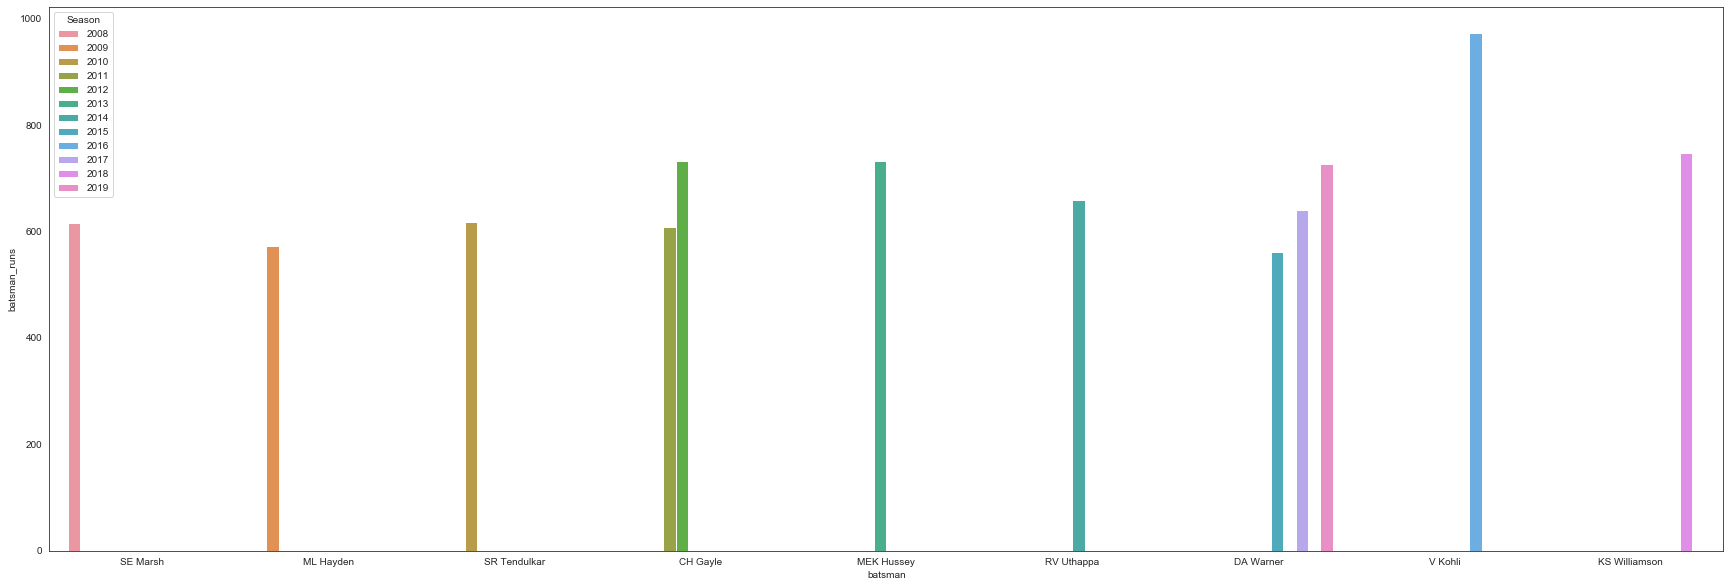

In [85]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='batsman',y='batsman_runs',hue='Season',data=X)

#plot of top run getter in each season, D Warner and C Gayle were top run getters in more than one Season

In [86]:
df6["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [87]:
df10=df4=copy.deepcopy(df6)

In [88]:
df10["wickets"]=df6['dismissal_kind'].apply(lambda x: 1 if x in ['caught','bowled','lbw','caught and bowled','stumped','hit wicket'] else 0)

# changing the wickets column as to count the no of wickets taken by the bowlers( not including run outs, ret hurt etc)

In [89]:
df10.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,new_id,wickets
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,11,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,11,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,0,NaN,NaN,11,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,11,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,0,NaN,NaN,11,0


In [90]:
df2_with_season=pd.merge(df10,lists,on="match_id")

# merging to include the season from the other dataframe

In [91]:
p=df2_with_season.groupby(["Season",'bowler'])["wickets"].sum()
P=p.to_frame()

In [92]:
P.head()

wickets
Season bowler            
2008   A Kumble         7
       A Mishra        11
       A Nehra         12
       A Nel            1
       A Symonds        0

In [93]:
PT=P.sort_values(by="wickets",ascending=False)

# sorting it so that top wicket taker comes on top

In [94]:
PT.reset_index(inplace=True)

In [95]:
z=[]
for i in range(2008,2020):
    z.append(PT[PT["Season"]==i].iloc[0])
    # extracting the highest wicket taker in each season

In [97]:
Z=pd.DataFrame(z)

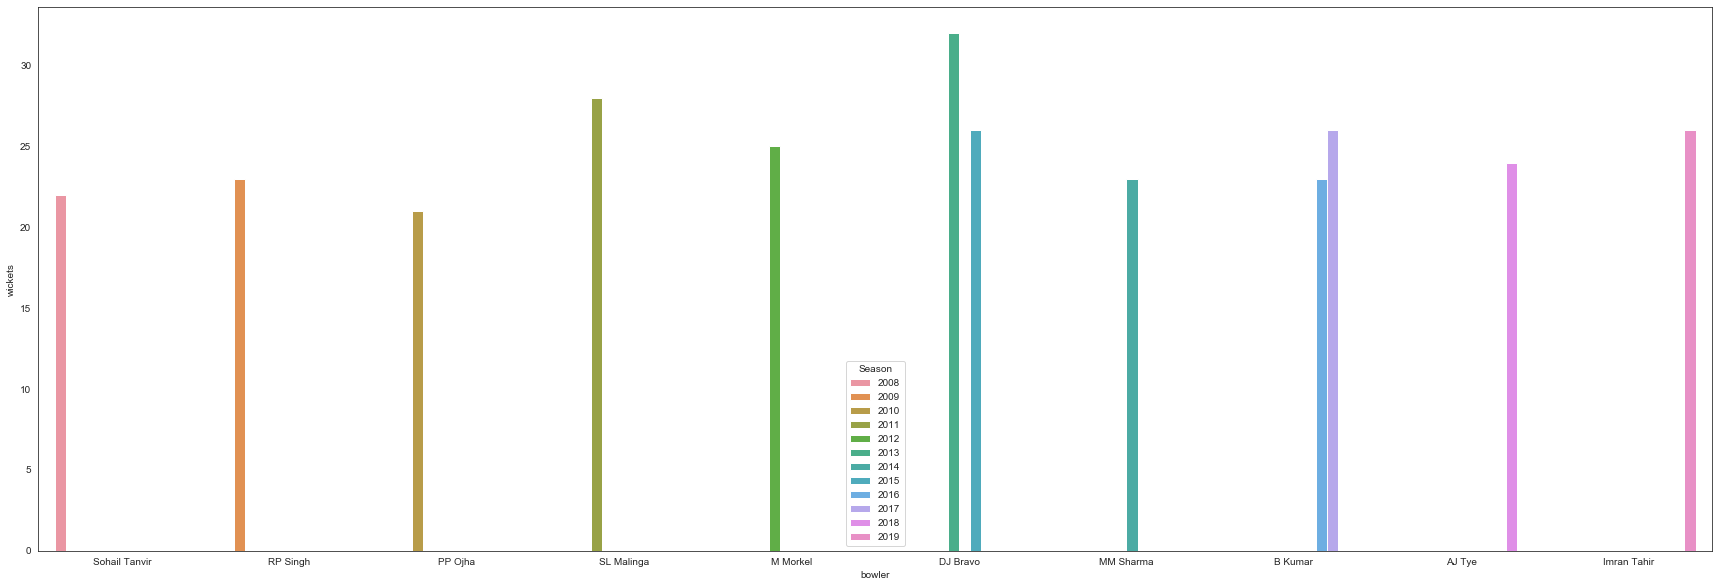

In [98]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="bowler",y='wickets',hue="Season" ,data=Z)
# plot of wicket takers, and no of wickets taken by season

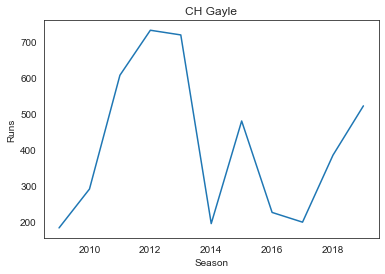

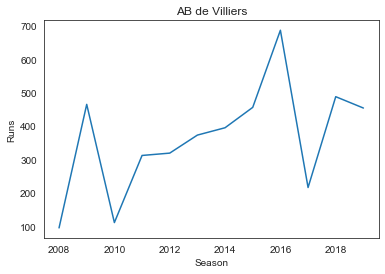

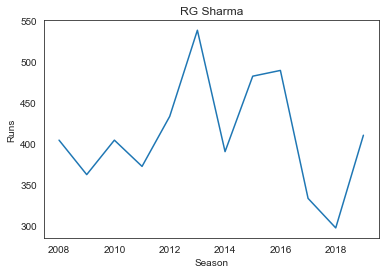

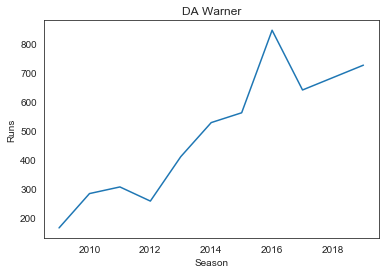

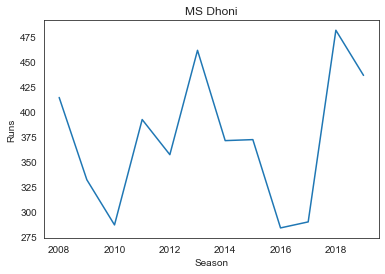

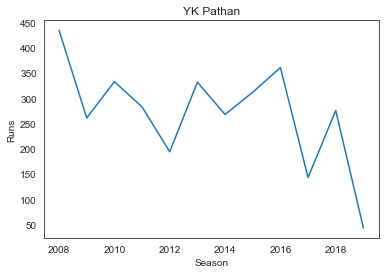

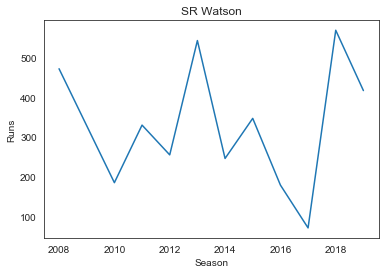

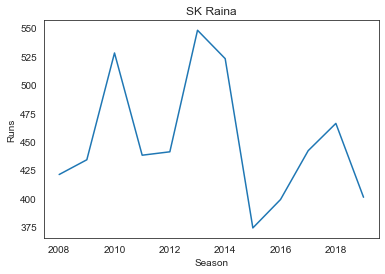

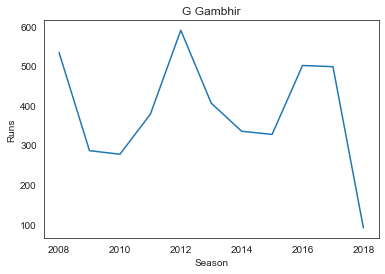

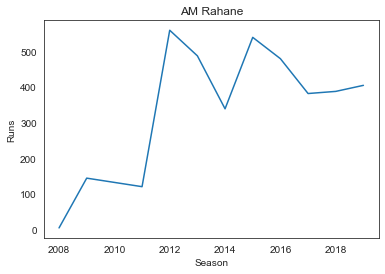

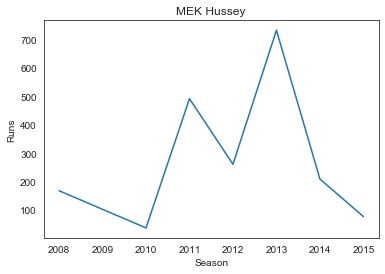

In [99]:
for i in range(0,11):
   plt.figure()
   plt.title(df_pom.iloc[i]["index"])
   plt.xlabel('Season')
   plt.ylabel("Runs") 
    
   plt.plot(Y[Y["batsman"]==df_pom.iloc[i]["index"]]["Season"],Y[Y["batsman"]==df_pom.iloc[i]["index"]]["batsman_runs"])

# plot of the runs scored by the top performers in each season to show the trend

In [102]:

P.reset_index(inplace=True)

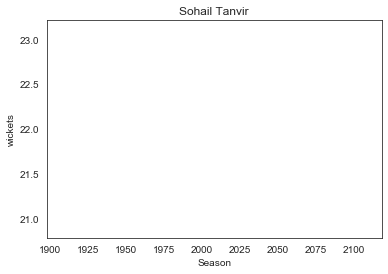

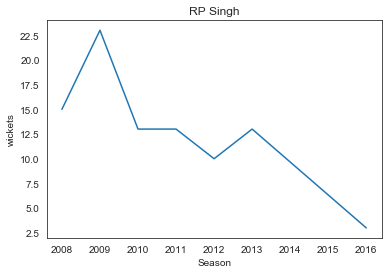

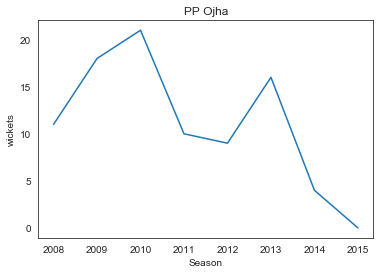

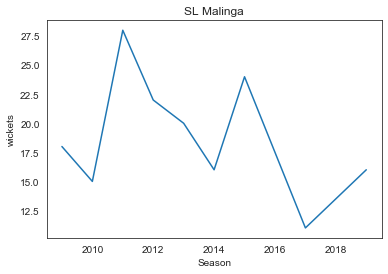

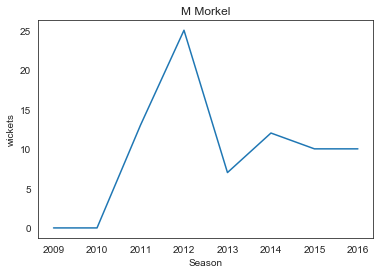

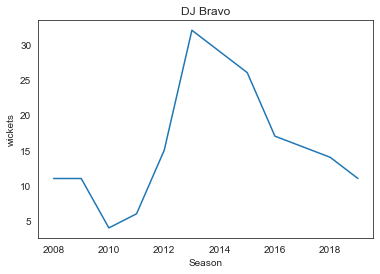

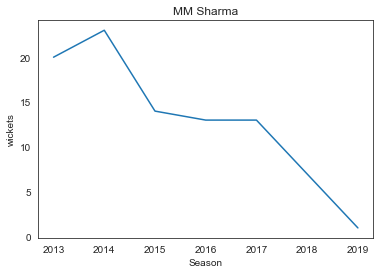

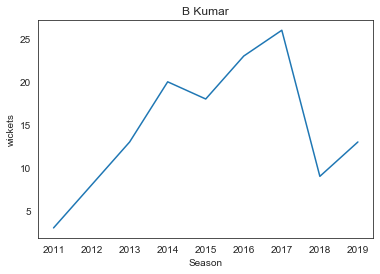

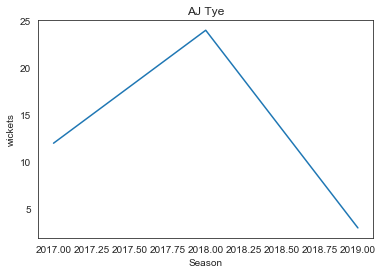

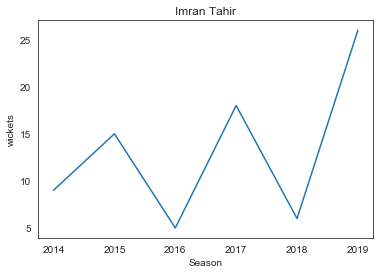

In [103]:
for i in range(0,10):
   plt.figure()
   plt.title(Z["bowler"].unique()[i])
   plt.xlabel('Season')
   plt.ylabel("wickets") 
   plt.plot(P[P["bowler"]==Z["bowler"].unique()[i]]["Season"],P[P["bowler"]==Z["bowler"].unique()[i]]["wickets"])
# plot of wickets taken by the top performers in each season to show the trend